# Analysis of hypotheses for increasing the revenue of an online store

According to the data provided by the marketing department, we will analyze a set of hypotheses for increasing the revenue of an online store

**Project Description**

In the course of this study, we will analyze hypotheses about an increase in the revenue of an online store.

**Research objectives**

Prioritize hypotheses, run an A/B test and analyze the results

**Initial data**

Three tables are presented for the study, including:

A table with data on hypotheses

A table with information about orders

A table with information about users

**This study will be divided into four parts:**

1. [Loading data and preparing it for analysis](#Loading-data-and-preparing-it-for-analysis)
2. [Prioritization of hypotheses](#Prioritization-of-hypotheses)
3. [A/B Test Analysis](#A/B-Test-Analysis)
4. [Conclusions](#Conclusions)

### Loading data and preparing it for analysis

Loading data about hypotheses, orders and users from CSV files into variables.

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
import scipy.stats as stats
 
register_matplotlib_converters()

try:
    hypothesis = pd.read_csv('D:/Документы/LinkedIn/5 Принятие решений в бизнесе/hypothesis.csv')
    orders = pd.read_csv('D:/Документы/LinkedIn/5 Принятие решений в бизнесе/orders.csv')
    visitors = pd.read_csv('D:/Документы/LinkedIn/5 Принятие решений в бизнесе/visitors.csv')
except:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
    orders = pd.read_csv('/datasets/orders.csv')
    visitors = pd.read_csv('/datasets/visitors.csv')

Let's look at the file with hypotheses:

In [2]:
display(hypothesis.head())
hypothesis.info()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


The data frame contains all the necessary data for calculating the ICE and ICE indicators

### Prioritization of hypotheses

#### ICE

ICE is calculated using the formula ICE core = (Impact x Confidence) / Efforts. Let's translate this into Python and sort it in descending order

In [3]:
hypothesis['ICE'] = (hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Confidence']
hypothesis.sort_values(by='ICE', ascending=False).head()

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,10.0
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,9.0
7,Добавить форму подписки на все основные страни...,10,7,8,5,7.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,5.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,3.0


According to the ICE methodology, the most priority hypothesis is to add two new channels to attract traffic.

#### RICE

Now let's calculate the ICE indicator, but with audience coverage. The RICE formula is as follows: RICE score = (Reach x Impact x Confidence) / Efforts

In [4]:
hypothesis['RICE'] = (hypothesis['Impact'] * hypothesis['Confidence'] * hypothesis['Reach']) / hypothesis['Confidence']
hypothesis.sort_values(by='RICE', ascending=False).head()

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,Добавить форму подписки на все основные страни...,10,7,8,5,7.0,70.0
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,10.0,30.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,3.0,24.0
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,3.0,24.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,3.0,15.0


Taking into account the coverage, the most priority theory becomes theory No. 7 - Add a subscription form to all the main pages. RICE showed the level of audience coverage. The seventh theory has a much higher score than the zero theory, which scored the most points in ICE.

### A/B Test Analysis

To begin with, let's look at the orders and visitors dataframes presented

In [5]:
display(orders.head())
orders.info()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


Convert the date column to the required format

In [6]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


Let's check that the data is collected correctly and the same users are not in both groups

In [7]:
crossing = np.intersect1d(
    orders.query('group == "A"')['visitorId'].unique(),
    orders.query('group == "B"')['visitorId'].unique())
orders = orders.query('visitorId not in @crossing')
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1016 non-null   int64         
 1   visitorId      1016 non-null   int64         
 2   date           1016 non-null   datetime64[ns]
 3   revenue        1016 non-null   int64         
 4   group          1016 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 47.6+ KB


It turned out that there are such IDs. They are removed from the calculation.

Next, we remove duplicates

In [8]:
visitors = visitors.drop_duplicates().reset_index(drop=True)
orders = orders.drop_duplicates().reset_index(drop=True)

In [9]:
display(visitors.head())
visitors.info()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Also, as in the previous data set, we transform date

In [10]:
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


There is enough data for analysis.

#### Cumulative revenue graph by group

Next, we will build the cumulative revenue graph itself by groups

In [11]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [12]:
datesGroups = orders[['date','group']].drop_duplicates()

In [13]:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [14]:
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [15]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

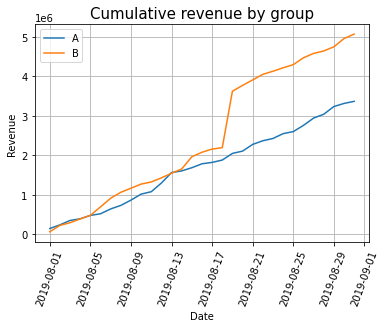

In [35]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend()
degrees = 70
plt.xticks(rotation=degrees)
plt.title("Cumulative revenue by group",fontsize=15)
plt.xlabel("Date",fontsize=10)
plt.ylabel("Revenue",fontsize=10)
plt.grid(True)

At first, the graph rises quite smoothly for both subgroups, but then a strong jump is noticeable for group B in the second part of the experiment. This may indicate outliers that distort the result. It's too early to draw any conclusions.

#### Graph of cumulative average check by groups

Let's plot the cumulative average check by groups and analyze it.

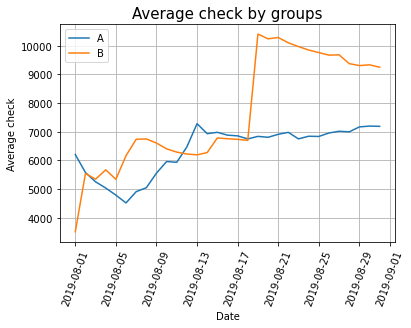

In [36]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend() 
plt.xticks(rotation=degrees)
plt.title("Average check by groups",fontsize=15)
plt.xlabel("Date",fontsize=10)
plt.ylabel("Average check",fontsize=10)
plt.grid(True)

A sharp spike in the indicator of group B is also noticeable here. But the reason becomes clearer - the surge in revenue was influenced rather by a small number of ordinary checks, but by one or more large purchases.

#### Graph of the relative change in the cumulative average check of group B to group A

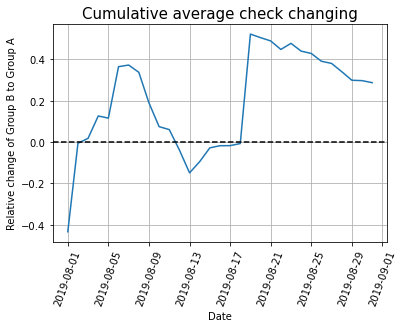

In [37]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation=degrees)
plt.title("Cumulative average check changing",fontsize=15)
plt.xlabel("Date",fontsize=10)
plt.ylabel("Relative change of Group B to Group A",fontsize=10)
plt.grid(True)

The situation has not become clearer. The ratio changes dramatically during the experiment. According to such data, correct conclusions cannot be drawn.

#### Graph of cumulative average number of orders per visitor by groups

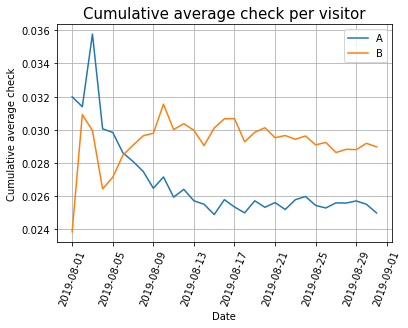

In [38]:
cumulativeOrderA = cumulativeData[cumulativeData['group']=='A'][['date','visitors', 'orders']]
cumulativeOrderB = cumulativeData[cumulativeData['group']=='B'][['date','visitors', 'orders']]
plt.plot(cumulativeOrderA['date'], cumulativeOrderA['orders']/cumulativeOrderA['visitors'], label='A')
plt.plot(cumulativeOrderB['date'], cumulativeOrderB['orders']/cumulativeOrderB['visitors'], label='B')
plt.legend()
plt.xticks(rotation=degrees)
plt.title("Cumulative average check per visitor",fontsize=15)
plt.xlabel("Date",fontsize=10)
plt.ylabel("Cumulative average check",fontsize=10)
plt.grid(True)

Another graph that confirms our theory that the results of the experiment distorted a few orders, but for large amounts. In addition, the graph data shows that there are no strong outliers with respect to the number of orders. If at the beginning the chart is very "mobile", then with the passage of time and the accumulation of results, the curves return to normal and show stable results - the number of orders in group B exceeds that in group A

#### Graph of the relative change in the cumulative average number of orders per visitor of group B to group A

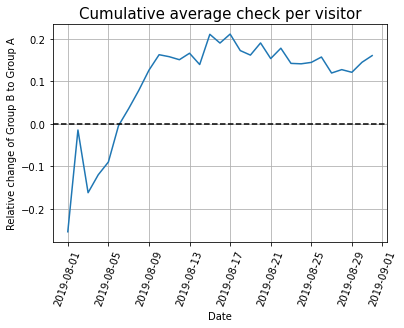

In [39]:
mergedCumulativeOrder = cumulativeOrderA.merge(cumulativeOrderB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.plot(mergedCumulativeOrder['date'], (mergedCumulativeOrder['ordersB']/mergedCumulativeOrder['visitorsB'])/(mergedCumulativeOrder['ordersA']/mergedCumulativeOrder['visitorsA'])-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation=degrees)
plt.title("Cumulative average check per visitor",fontsize=15)
plt.xlabel("Date",fontsize=10)
plt.ylabel("Relative change of Group B to Group A",fontsize=10)
plt.grid(True)

The graph shows that the average number of Group B orders is consistently higher than Group A

#### Dot graph of the number of orders by users

Let's look in more detail at the number and amounts of user orders.

First, let's build a graph based on the number of orders per user

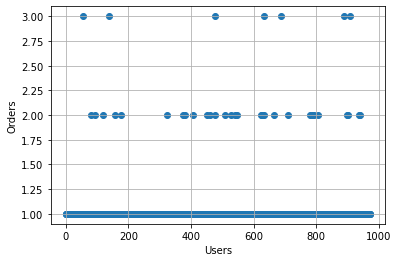

In [40]:
ordersByUsers = (orders.groupby('visitorId', as_index=False).agg({'transactionId': 'nunique'}))
ordersByUsers.columns = ['userId', 'orders']
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])
plt.xlabel("Users",fontsize=10)
plt.ylabel("Orders",fontsize=10)
plt.grid(True)

The graph shows that the majority of users have placed one order. Some more - two at a time. The maximum number of orders per user is 3, which is not a lot at all. There are no significant emissions.

#### 95th and 99th percentiles of the number of orders per user

Let's calculate the 95th and 99th percentiles of the number of orders per user and determine the boundary of abnormal values

In [22]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([1., 2.])

There are no strong attacks. Let's limit the sample to 99% percent of users.

#### Dot chart of order values

Let's look at the cost of orders.

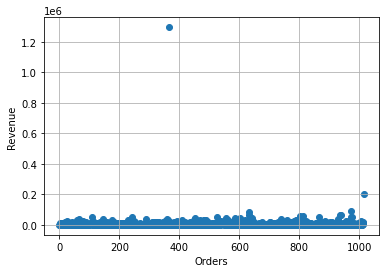

In [23]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 
plt.xlabel("Orders",fontsize=10)
plt.ylabel("Revenue",fontsize=10)
plt.grid(True)

The order which greatly distorted the selection is immediately visible. It's interesting to see him.

In [24]:
display(orders['revenue'].sort_values(ascending=False).head(1))
orders['revenue'].median()

365    1294500
Name: revenue, dtype: int64

2955.0

Almost 1.3 million! With a median value of three thousand. Perhaps this is a technical error. It would be advisable to check the data collection system, but this is not included in the authority of the current project. For the purposes of our project, of course, such an order must be excluded.

#### 95th and 99th percentiles of the cost of orders

To better estimate the cutoff boundary, let's look at the remaining orders in 95 and 99 percentiles

In [25]:
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

Given the median value of 3 thousand, it is more logical to limit under 95 percentile.

#### Statistical significance of differences in the average number of orders per visitor between groups based on "raw" data

In subsequent tests, we will determine the level of statistical significance at 5%, that is, 0.05 of this threshold is sufficient for conducting experiments with A/B test data. Greater precision is not necessary.

In addition, here and further we will conduct A/B testing using the nonparametric Mann-Whitney test

The null hypothesis is defined in the fact that there are no statistically significant differences between the groups. It will also apply to all subsequent text.

In [41]:
VisitorsPerDateA = visitors[visitors['group'] == 'A']
VisitorsPerDateB = visitors[visitors['group'] == 'B']

UnfiltOrdersByUsersA = (
    orders[orders['group'] == 'A'].groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique}))
UnfiltOrdersByUsersA.columns = ['userId', 'orders']

UnfiltOrdersByUsersB = (
    orders[orders['group'] == 'B'].groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique}))
UnfiltOrdersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat(
    [UnfiltOrdersByUsersA['orders'],pd.Series(
        0, index=np.arange(VisitorsPerDateA['visitors'].sum() - len(
            UnfiltOrdersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat(
    [UnfiltOrdersByUsersB['orders'],pd.Series(
        0, index=np.arange(VisitorsPerDateB['visitors'].sum() - len(
            UnfiltOrdersByUsersB['orders'])), name='orders')],axis=0)
 
alpha = 0.05
   
result_1 = stats.mannwhitneyu(sampleA, sampleB)[1]
print('Coefficient p-value:', "{0:.3f}".format(result_1))
if result_1 < alpha:
    print("There are statistically significant differences in the average number of orders between the groups")
else:
    print("There are no statistically significant differences in the average number of orders between the groups")

print('Relative gain of Group B:', "{0:.2f}".format((sampleB.mean() / sampleA.mean() - 1) * 100), '%')

Coefficient p-value: 0.011
There are statistically significant differences in the average number of orders between the groups
Relative gain of Group B: 15.98 %


As we can see, the outliers affected the reliability of the test. According to the filtered data, the average number of orders in group B is higher, but the samples are distorted, which is why such an experiment cannot be considered as the final result.
However, it is interesting that the differences appeared where there are not many attacks.

#### Statistical significance of differences in the average order receipt between groups based on "raw" data

In [42]:
result_2 = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]
print('Coefficient p-value:', "{0:.3f}".format(result_2))
if result_2 < alpha:
    print("There are statistically significant differences in the average order receipt between the groups")
else:
    print("There are no statistically significant differences in the average order receipt between the groups")
    
print('Relative gain of Group B:', '{0:.2f}'.format((orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1) * 100), '%') 

Coefficient p-value: 0.829
There are no statistically significant differences in the average order receipt between the groups
Relative gain of Group B: 28.66 %


Here is the opposite situation. There is a giant outburst, but the analysis showed that there are no statistically significant differences in the average order receipt between the groups. The more interesting it will be to look at the unfiltered data. As for winning Group B by 28%, this is quite a serious result. But the final conclusion can be made after all the tests.

#### Statistical significance of differences in the average number of orders per visitor between groups based on "cleared" data

The cleared data will contain orders with a value of up to 26,785 in revenue and up to 2 orders per user inclusive.

In [28]:
max_revenue = orders['revenue'].quantile(0.95)
max_order = ordersByUsers['orders'].quantile(0.99)
usersWithManyOrders = pd.concat(
    [   UnfiltOrdersByUsersA[UnfiltOrdersByUsersA['orders'] > max_order]['userId'],
        UnfiltOrdersByUsersB[UnfiltOrdersByUsersB['orders'] > max_order]['userId'],
    ],
    axis=0,)
usersWithExpensiveOrders = orders[orders['revenue'] > max_revenue]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values())

In [29]:
sampleAFiltered = pd.concat([UnfiltOrdersByUsersA[np.logical_not(UnfiltOrdersByUsersA['userId'].isin(abnormalUsers))]['orders'],
        pd.Series(0, index=np.arange(VisitorsPerDateA['visitors'].sum() - len(UnfiltOrdersByUsersA['orders'])),
            name='orders',),],axis=0,)

sampleBFiltered = pd.concat([UnfiltOrdersByUsersB[np.logical_not(UnfiltOrdersByUsersB['userId'].isin(abnormalUsers))]['orders'],
        pd.Series(0, index=np.arange(VisitorsPerDateB['visitors'].sum() - len(UnfiltOrdersByUsersB['orders'])),
            name='orders',),],axis=0,)

In [30]:
sampleAFiltered

0        1
1        1
2        1
3        1
4        1
        ..
18286    0
18287    0
18288    0
18289    0
18290    0
Name: orders, Length: 18709, dtype: int64

In [31]:
UnfiltOrdersByUsersB

,userId,orders
0,5114589,1
1,6958315,1
2,39475350,1
3,47206413,1
4,48147722,1
...,...,...
523,4251115836,1
524,4258103007,1
525,4279090005,1
526,4281247801,1


In [43]:
result_3 = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]
print('Coefficient p-value:', "{0:.3f}".format(result_3))
if result_3 < alpha:
    print("There are statistically significant differences in the average number of orders between the groups")
else:
    print("There are no statistically significant differences in the average number of orders between the groups")
    
print('Relative gain of Group B:', '{0:.2f}'.format((sampleBFiltered.mean()/sampleAFiltered.mean()-1) * 100), '%') 

Coefficient p-value: 0.012
There are statistically significant differences in the average number of orders between the groups
Relative gain of Group B: 18.19 %


The results have changed slightly compared to the raw data. The p-value coefficient still shows that there are differences. But Group B still shows an advantage.

In [33]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,3797467345,1196621759,2019-08-15,9759,B
3,2282983706,2322279887,2019-08-15,2308,B
4,182168103,935554773,2019-08-15,2210,B


#### Statistical significance of differences in the average order receipt between groups based on "cleared" data

In [44]:
result_3 = stats.mannwhitneyu(
        orders[np.logical_and(
            orders['group'] == 'A', np.logical_not(
                orders['visitorId'].isin(abnormalUsers)),)]['revenue'], orders[np.logical_and(
            orders['group'] == 'B', np.logical_not(
                orders['visitorId'].isin(abnormalUsers)),)]['revenue'],)[1]
print('Коэффициент p-value:', "{0:.3f}".format(result_3))
if result_3 < alpha:
    print("There are statistically significant differences in the average order receipt between the groups")
else:
    print("There are no statistically significant differences in the average order receipt between the groups")
    
print('Relative gain of Group B:', "{0:.3f}".format(((
        orders[np.logical_and(orders['group'] == 'B', np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'].mean()
        / orders[np.logical_and(orders['group'] == 'A', np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'].mean()
        - 1) * 100), '%'))

Коэффициент p-value: 0.646
There are no statistically significant differences in the average order receipt between the groups
Relative gain of Group B: -4.847


The first metric by which group B loses to group A. In addition, the p-value coefficient indicates that there are no significant differences between the two groups.

### Conclusions

In my opinion, the test needs to be stopped. There are several reasons for this:

    1. Significant statistical differences are observed in half of the tests performed.
    
    2. The results are contradictory. The most reliable test is based on purified data and in which there are no statistically significant differences, group A is better than group B, although in all other tests B is better than A.
    
    3. Users are poorly divided. Slightly less than 10% of users fall into both groups at once.
    
    4. Possible technical error with the purchase of 1.3 million. Other errors are also possible.
    
    5. After setting up the test, its results will be different and the current data will be irrelevant and unrelated to future results.

Thus, we can conclude that the test is not successful. It requires improvement on the points that I described above. In addition, the results are ambiguous due to the last test, which is the most accurate (cleared data + normal p-value level), showed different results from other tests. Nevertheless, it is worth restarting the test, since group B showed significant superiority in 3 out of 4 metrics.